# Pricing a Quanto.

## The infamous currency triangle.

We know that the cross 

$$XAUUSD = \frac{XAUEUR}{USDEUR}$$

The continuously compounded returns on the pair $XAUUSD$ are the log of the price relative. So,

$$r^{XAUUSD} = \log\left(\frac{XAUUSD_{t}}{XAUUSD_{t-1}}\right)$$

Thus:

$$
\begin{align*}
r^{XAUUSD} &= \log\left(\frac{\frac{XAUEUR_{t}}{USDEUR_t}}{\frac{XAUEUR_{t-1}}{USDEUR_{t-1}}}\right)\\
&= \log\left(\frac{XAUEUR_{t}}{XAUEUR_{t-1}}\right) - \log \left(\frac{USDEUR_t}{USDEUR_{t-1}}\right)\\
&= r^{XAUEUR} - r^{USDEUR}
\end{align*}
$$

Since these returns are random variables, we have:

$$
\begin{align*}
\sigma_{XAUUSD}^2 &= \sigma_{XAUEUR}^2 + \sigma_{USDEUR}^2 - 2\sigma_{XAUEUR}\cdot \sigma_{USDEUR}\cdot \rho_{XAUEUR,USDEUR}
\end{align*}
$$

This looks very familiar to the cosine rule and we can visualize this calculation using elementary geometry. Label the corners of the triangle $XAU$, $EUR$, and $USD$, the vectors of the edges $\overrightarrow{\sigma}_1$ from $XAU$ to $USD$, $\overrightarrow{\sigma}_2$ from $XAU$ to $EUR$, and $\overrightarrow{\sigma}_3$ from $USD$ to $EUR$. The edge lengths can be viewed as volatilities and the cosines of the angles as correlations.

![Currency triangle](currency_triangle.jpg)

So, in the FX market, the correlation structure can be computed explicitly in terms of the known volatilities using the interdependence of exchange rates. 

## What if the two currency pairs don't have a common currency?

You must read this excellent [note](https://www.mathfinance.com/wp-content/uploads/2020/09/rainbow.pdf) by Wystup. For example, to compute the correlation between GBPJPY and EURUSD, you inflate the market of these two currency pairs to include  following ${4 \choose 2} = 6$ pairs, for example: GBPJPY, GBPEUR, GBPUSD, EURJPY, USDJPY and EURUSD. Geomtrically, we introduce a tetrahedron with triangular sides whose corners are the four currencies and each of the ${6 \choose 2}=15$ correlations can be implied.

## Quanto-drift adjustment.

A quanto option is any cash-settled option, whose payoff is converted into a third currency at maturity at a pre-specified rate, called the *quanto factor*. 

Consider the example of a Gold contract with underlying XAU/USD in XAU-USD quotation quantoed in EUR. Since the payoff is in EUR, we let EUR be the numeraire or domestic currency. 


Consider the Black-Scholes model with $\mathbb{Q}$-dynamics:

$$
\begin{align*}
\text{XAU-EUR : } dS_t^{(3)} &= S_t^{(3)}((r_{EUR} - r_{XAU})dt + \sigma_3 dW_t^{(3)}) \\
\text{USD-EUR : } dS_t^{(2)} &= S_t^{(2)}((r_{EUR} - r_{USD})dt + \sigma_2 dW_t^{(2)}) \\
dW_t^{(3)}dW_t^{(2)} &= \rho_{23} dt
\end{align*}
$$

The actual underlying is $S_t^{(1)} = XAUUSD$. And

$$S_t^{(1)} = \frac{S_t^{(3)}}{S_t^{(2)}}$$

By Ito's formula, we have:

$$
\begin{align*}
d\frac{1}{S_t^{(2)}} &= -\frac{1}{(S_t^{(2)})^2} dS_t^{(2)} + \frac{1}{2}\cdot\frac{2}{(S_t^{(2)})^3}dS_t^{(2)}\cdot dS_t^{(2)}\\
&= -\frac{1}{S_t^{(2)}}((r_{EUR} - r_{USD})dt + \sigma_2 dW_t^{(2)})+\frac{1}{S_t^{(2)}}\sigma_2^2 dt\\
&= \frac{1}{S_t^{(2)}}(r_{USD} - r_{EUR} + \sigma_2^2)dt - \frac{1}{S_t^{(2)}}\sigma_2 dW_t^{(2)})
\end{align*}
$$

So, I can write:

$$
\begin{align*}
dS_t^{(1)} &= \frac{1}{S_t^{(2)}}dS_t^{(3)} + S_t^{(3)}d\frac{1}{S_t^{(2)}} + d\frac{1}{S_t^{(2)}}\cdot dS_t^{(3)}\\
&= S_t^{(1)}((r_{EUR} - r_{XAU})dt + \sigma_3 dW_t^{(3)}) \\
&+ S_t^{(1)}((r_{USD} - r_{EUR} + \sigma_2^2)dt- \sigma_2 dW_t^{(2)})) \\
&- S_t^{(1)}\sigma_2 \sigma_3 \rho_{23}dt \\
&= S_t^{(1)}((r_{USD}- r_{XAU}+ \sigma_2^2 -\sigma_2 \sigma_3 \rho_{23})dt \\
&+ S_t^{(1)}(\sigma_3  dW_t^{(3)} - \sigma_2 dW_t^{(2)})
\end{align*}
$$

We can introduce another process:

$$dW_t^{(1)} = \frac{\sigma_3  dW_t^{(3)} - \sigma_2 dW_t^{(2)}}{\sigma_1}$$

Integrating on both sides, we find that $W_t^{(1)}$ is a martingale. Further:

$$
\begin{align*}
dW_t^{(1)} \cdot dW_t^{(1)} &= \frac{(\sigma_3  dW_t^{(3)} - \sigma_2 dW_t^{(2)})^2}{\sigma_1^2} \\
&=\frac{\sigma_3^2 + \sigma_2^2 - 2\sigma_2 \sigma_3 \rho_{23}}{\sigma_1^2}\cdot dt \\
&= dt
\end{align*}
$$

Thus, it has quadratic variation $t$. So, by the levy characterization theorem, $W_t^{(3)}$ is a standard brownian motion. And we can write:

$$dS_t^{(1)} = S_t^{(1)}((r_{USD}- r_{XAU}+ \sigma_2^2 -\sigma_2 \sigma_3 \rho_{23})dt + \sigma_1 S_t^{(1)}dW_t^{(1)}$$

The law of cosines implies that:

$$
\begin{align*}
\sigma_3^2 &= \sigma_1^2 + \sigma_2^2 - 2\sigma_1 \sigma_2 \rho_{12}\\
\sigma_1^2 &= \sigma_3^2 + \sigma_2^2 - 2\sigma_2 \sigma_3 \rho_{23}
\end{align*}
$$

which yields

$$
\begin{align*}
 \sigma_2^2 -  \sigma_2 \sigma_3 \rho_{23}  &= \sigma_1 \sigma_2 \rho_{12}
\end{align*}
$$

Inserting this into the equation for the dynamics of $S_t^{(1)}$, we have:

$$dS_t^{(1)} = S_t^{(1)}((r_{USD}- r_{XAU}+ \sigma_1 \sigma_2 \rho_{12})dt + \sigma_1 S_t^{(1)}dW_t^{(1)}$$

## Quanto Vanilla

Common among FX options is a quanto plain vanilla paying

$$V_T = Q[(S_T - K)^{+}]$$

where $S_T$ is the underlying for the FOR-DOM quotation. 

We can write the $\mathbb{Q}$-dynamics of the FOR-DOM pair as:

$$dS_t^{(1)} = S_t^{(1)}((r_{DOM}- r_{FOR}+ \sigma_{1} \sigma_{2} \rho_{12})dt + \sigma_1 S_t^{(1)}dW_t^{(1)})$$

where $\sigma_1$ is the volatility of the FOR-DOM, $\sigma_2$ is the volatility of DOM-QUANTO and $\rho_{12}$ is the correlation between FOR-DOM,DOM-QUANTO pairs. 

The solution to this SDE is:

$$S_t^{(1)} = S_0^{(1)}\exp\left((r_{DOM}- r_{FOR}+ \sigma_{1} \sigma_{2} \rho_{12} - \frac{\sigma_1^2}{2})t + \sigma_1 S_t^{(1)}W_t^{(1)}\right)$$

## Standard Black formula for Quanto Vanilla

Let $r_Q$ be the interest rate in the QUANTO currency. By the risk-neutral pricing formula, the value at time $t$ is:

$$
\begin{align*}
V(t,x) &= e^{-r_{Q}\tau}Q\mathbb{E}^{\mathbb{Q}}[(S_T - K)\cdot 1_{S_T > K}|\mathcal{F}_t] \\
&= e^{-r_{Q}\tau}Q \left[ \mathbb{E}^{\mathbb{Q}}[S_T \cdot 1_{S_T > K}|\mathcal{F}_t] -  K\mathbb{E}^{\mathbb{Q}}[ 1_{S_T > K}|\mathcal{F}_t]\right]
\end{align*}
$$

The two expectations are computed in the [standard way](https://quantophile.github.io/mathsummaries/post/2023/11/15/the-black-scholes-formula-for-a-european-call/), as in Black-Scholes theory. We get:

$$
\begin{align*}
V(t,S_t) &= e^{-r_{Q}\tau}Q\left[S_t e^{\tilde{\mu}\tau}\Phi(d_{+}(\tau,S_t)) - K\Phi(d_{-}(\tau,S_t))\right]\\
d_{\pm}(\tau,x) &= \frac{\log\frac{x}{K} + (\tilde{\mu}\pm\frac{\sigma_1^2}{2})\tau}
{\sigma\sqrt{\tau}}\\
\tilde{\mu} &= r_{DOM} - r_{FOR} - \sigma_1 \sigma_2 \rho_{12}
\end{align*}
$$

In [12]:
import numpy as np
from scipy.stats import norm

# ---------------------------------------
# Black formula for European Quanto Call
# ---------------------------------------

def d_plus(tau,x,K,mu,sigma):
    return (np.log(x/K) + (mu + (sigma**2)/2)*tau)/(sigma * np.sqrt(tau))

def d_minus(tau,x,K,mu,sigma):
    return (np.log(x/K) + (mu - (sigma**2)/2)*tau)/(sigma * np.sqrt(tau))

def blackScholes(S_t,K,r_DOM,r_FOR,r_Q,tau,sigma_1,sigma_2,sigma_3,Q,notional):
    rho_12 = (sigma_1**2 + sigma_2**2 - sigma_3**2)/(2*sigma_1*sigma_2)
    mu = r_DOM - r_FOR - (sigma_1 * sigma_2 * rho_12)
    d1 = d_plus(tau,S_t,K,mu,sigma_1)
    d2 = d_minus(tau,S_t,K,mu,sigma_1)
    phi_d_plus = norm.cdf(d1)
    phi_d_minus = norm.cdf(d2)
    df_quanto = np.exp(-r_Q * tau)
    return (df_quanto * Q * (S_t * np.exp(mu * tau) * phi_d_plus - K * phi_d_minus))* notional


In [16]:
# -----------------------------
#   Inputs to the model
# -----------------------------
FOR = 'XAU'
DOM = 'USD'
QUANTO = 'EUR'

notionalInQuantoCcy = 1
strike = 810
maturityInYears = 1.00
FORDOM_spot = 800
DOMQUANTO_spot = 1.00
FORQUANTO_spot = FORDOM_spot * DOMQUANTO_spot
FORDOM_vol = 0.10
DOMQUANTO_vol = 0.12
FORQUANTO_vol = 0.20591260281974003

r_FOR = 0.005; r_DOM = 0.02; r_QUANTO = 0.04;

quanto_call = blackScholes(
                S_t = FORDOM_spot, 
                K = strike,
                r_DOM = r_DOM,
                r_FOR = r_FOR,
                r_Q = r_QUANTO,
                tau = maturityInYears,
                sigma_1 = FORDOM_vol,
                sigma_2 = DOMQUANTO_vol,
                sigma_3 = FORQUANTO_vol,
                Q = 1,
                notional = notionalInQuantoCcy
            )
print(f"Quanto Call Option price = {quanto_call} {QUANTO}")

Quanto Call Option price = 35.9550188943399 EUR


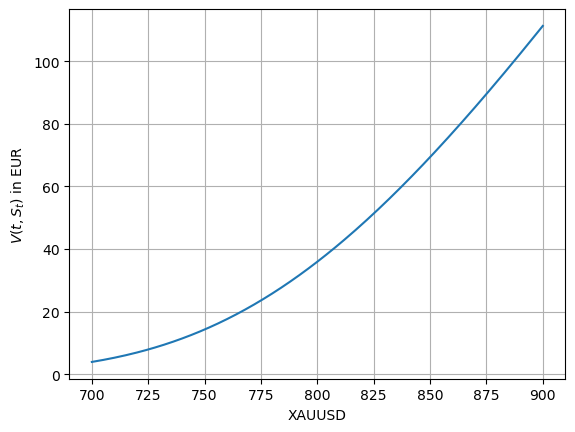

In [19]:
import matplotlib.pyplot as plt


FORDOM_spot = np.linspace(700,900,201)
quanto_prices = []

for S_t in FORDOM_spot:
    black_price = blackScholes(
                    S_t = S_t, 
                    K = strike,
                    r_DOM = r_DOM,
                    r_FOR = r_FOR,
                    r_Q = r_QUANTO,
                    tau = maturityInYears,
                    sigma_1 = FORDOM_vol,
                    sigma_2 = DOMQUANTO_vol,
                    sigma_3 = FORQUANTO_vol,
                    Q = 1,
                    notional = notionalInQuantoCcy
            )
    quanto_prices.append(black_price)

    
plt.grid(True)
plt.xlabel(f"{FOR}{DOM}")
plt.ylabel(r"$V(t,S_t)$ in EUR")
plt.plot(FORDOM_spot,quanto_prices)
plt.show(True)